In [1]:
# 머신러닝 : 예측(prediction)  분류(classification), 군집(clustering)
# 지도학습(정답이 있음) : 예측, 분류
# 비지도학습(정답이 없음) : 군집
# 단순회귀 분석
# 데이터정리 - 데이터분리 - 알고리즘 준비(모델)- 학습 -예측 -평가 - 최종 적용
#                                |                             |
#                                 -----------------------------  

In [2]:
# 보통 소득이 증가하면 소비도 증가한다.
# 독립변수(X) 종속변수(y) : x가 y에 영향을 준다. 선형관계
# f(x) = ax + b 
# a는 기울기  b는 절편 
# 일차원 방정식의 계수 a,b를 찾는과정

In [3]:
# 1. 데이터 준비
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#. 이상치제거 x, 결측치 대처 x
url = 'https://raw.githubusercontent.com/leekyuyoung20230313/pythone/main/datas/auto-mpg.csv'
df = pd.read_csv(url,header=None)
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight','acceleration','modelyear','origin','name']
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [11]:
# 데이터 탐색
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   modelyear     398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
df.describe()

,0,1,2,4,5,6,7
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


<Axes: >

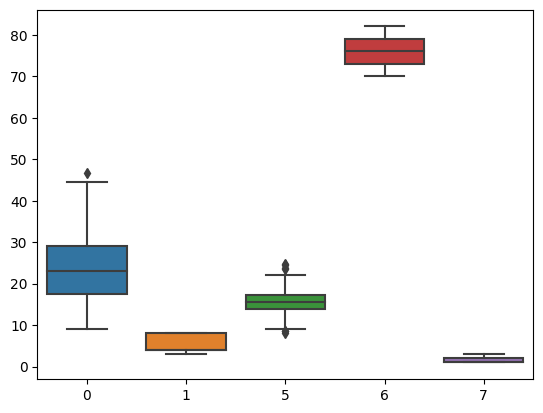

In [9]:
# 이상치 유무 확인
sns.boxplot(df.drop(columns=[2,4]))

In [12]:
# horsepower 여기서 정상적인 데이터가 아닌 데이터의 row는 제거하고 타입을 float 으로변경
df['horsepower'].astype('float')

ValueError: ignored

In [15]:
df['horsepower'] = pd.to_numeric(df['horsepower'],errors='coerce').astype(float)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   modelyear     398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [18]:
# 단순 회귀분석에 사용할 컬럼(특징,변수,독립변수)들을 선택
new_df = df.iloc[:,:-1]
new_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


<Axes: xlabel='weight', ylabel='mpg'>

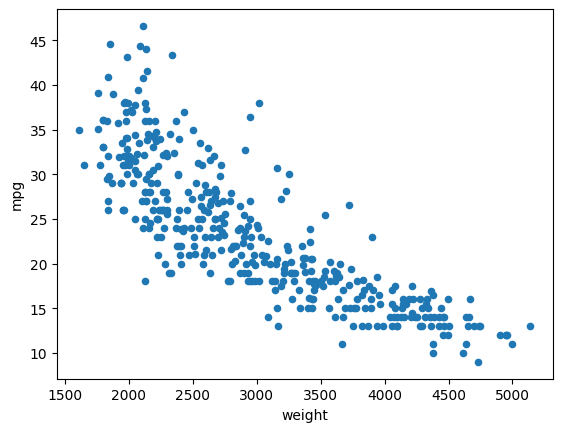

In [20]:
# 선형관계가 있는 변수들을 추려내야 함 - 그래프를 그려서 시각적으로 확인
# 산점도를 통해
new_df.plot(kind='scatter', x='weight', y='mpg')

<Axes: xlabel='weight', ylabel='mpg'>

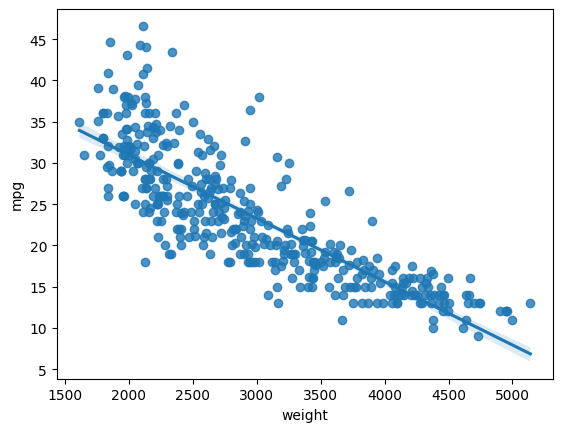

In [22]:
# 회귀선이 잇는 sns 를 통해 다시 확인
sns.regplot(data=new_df,x='weight', y='mpg')

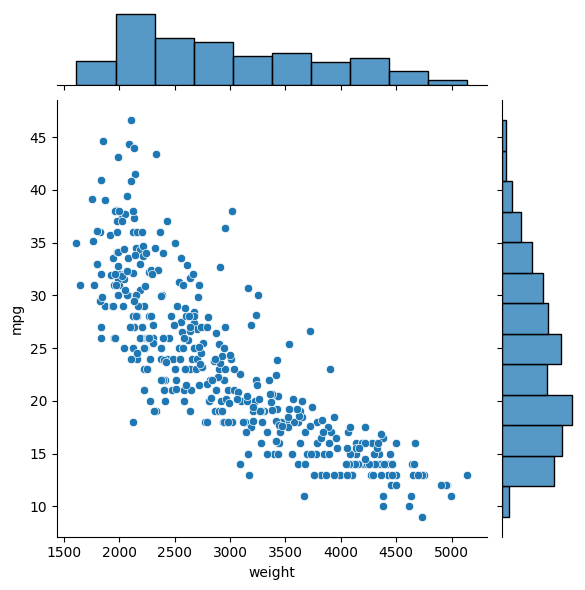

In [23]:
sns.jointplot(data=new_df,x='weight', y='mpg')

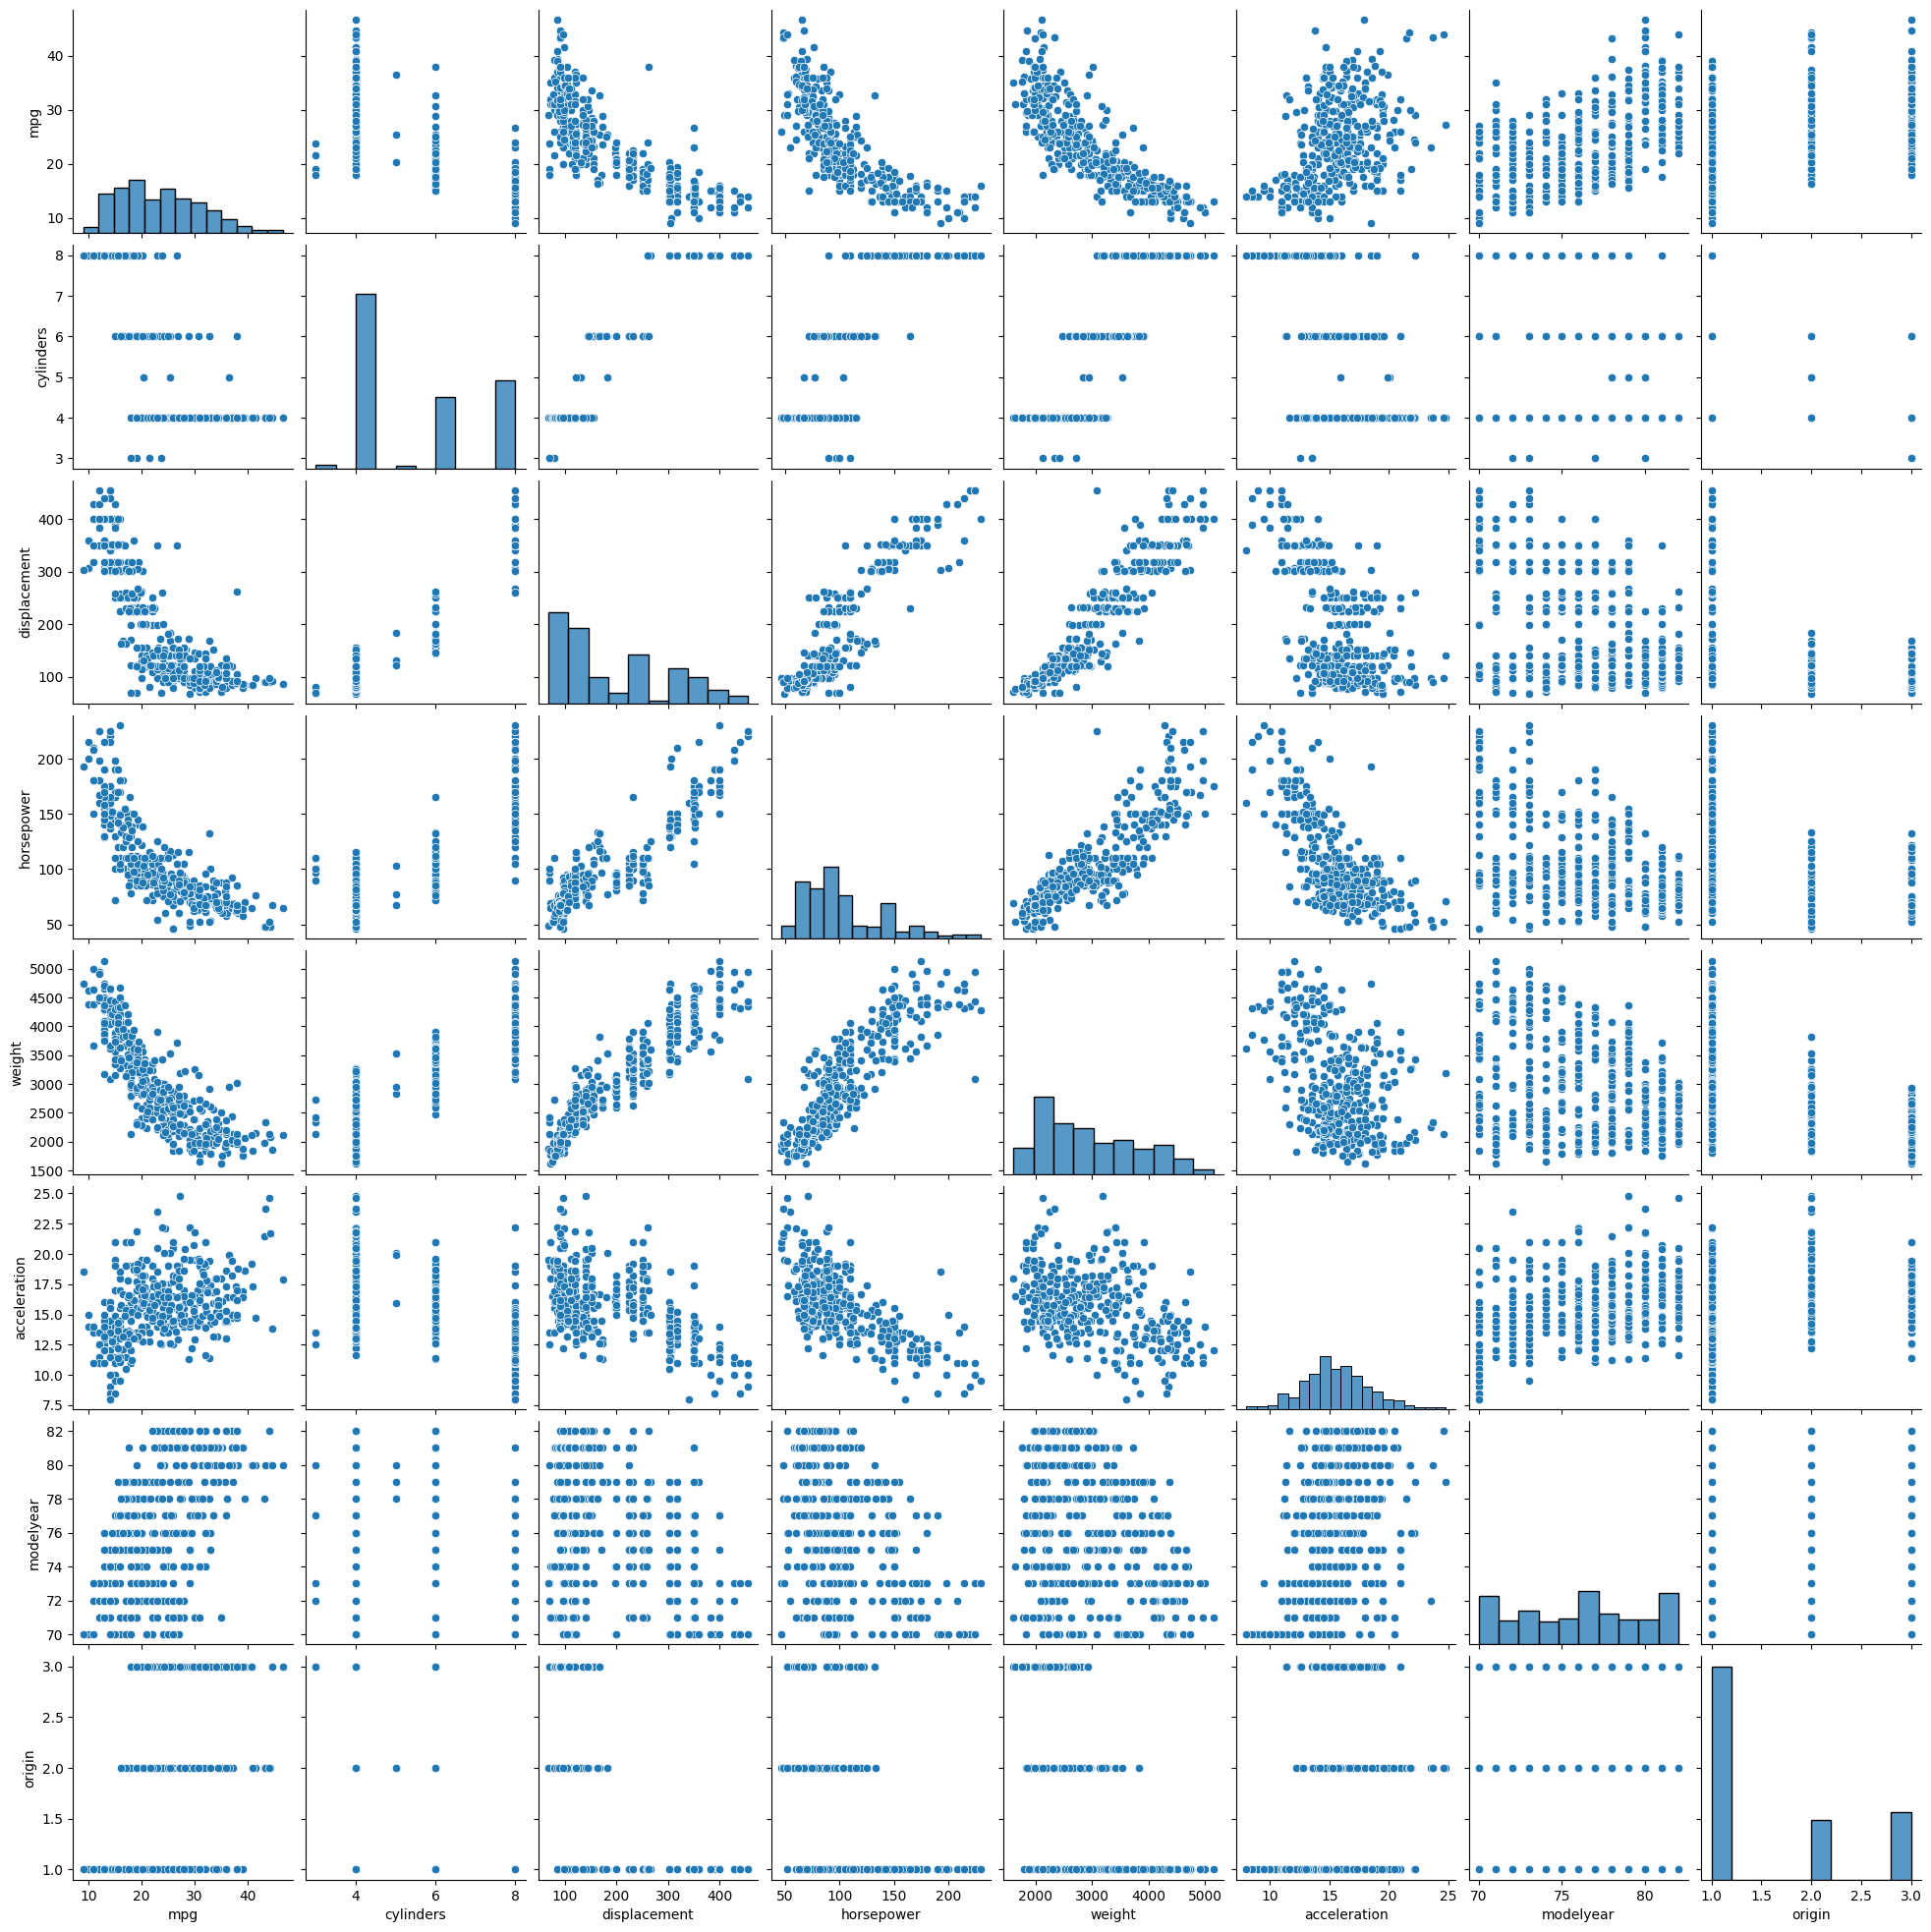

In [24]:
sns.pairplot(new_df)

In [27]:
machin_df = new_df.iloc[:,[0,2,3,4]]
machin_df.head()

,mpg,displacement,horsepower,weight
0,18.0,307.0,130.0,3504.0
1,15.0,350.0,165.0,3693.0
2,18.0,318.0,150.0,3436.0
3,16.0,304.0,150.0,3433.0
4,17.0,302.0,140.0,3449.0


In [41]:
# 데이터를 섞어준다.
import random
temp = list(range(10))
random.shuffle(temp)
temp

[2, 0, 4, 6, 5, 9, 1, 8, 7, 3]

In [28]:
# 데이를 훈련 / 검증 분할  7:3
X = machin_df[['weight']]
Y = machin_df[['mpg']]

In [30]:
split_count = int(len(X)*0.7)

In [35]:
# 데이터를 섞지 않았음.... 섞어 줄것
train_x = X[:split_count]
train_y = Y[:split_count]

test_x = X[split_count:]
test_y = Y[split_count:]

In [33]:
# 학습 - 적절한 알고리즘(모델)을 선택
from sklearn.linear_model import LinearRegression

In [36]:
# 단순선형 회귀분석모델 객체 생성
lr = LinearRegression()
# 훈련용 데이터로 학습
lr.fit(train_x,train_y)

LinearRegression()

In [37]:
# 결정계수  0 ~ 1 사이 
r_square = lr.score(test_x,test_y)
r_square

-0.2855891194399749